In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('2011-16 Stats Only Bench.xlsx')
df

,Player,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference,Bench
0,Kyrie Irving,19.096,8.31,7.3,13.7,0.529,4.9,8.6,0.569,2.4,...,1.8,16.4,1.722222,75,193,3.0,76.00,75.67,1.00,0
1,Brandon Knight,19.208,8.91,6.4,15.1,0.423,3.8,8.3,0.461,2.6,...,0.6,16.8,1.342857,75,195,5.0,78.75,78.38,3.75,1
2,Kemba Walker,21.051,10.44,8.2,19.2,0.428,6.2,13.3,0.471,1.9,...,0.5,9.5,2.000000,73,184,16.0,75.50,74.50,2.50,0
3,Jimmer Fredette,22.123,5.76,10.5,23.1,0.452,6.7,13.7,0.491,3.7,...,0.1,12.7,1.200000,74,195,NaN,77.00,76.75,3.00,0
4,Nolan Smith,22.338,8.31,8.3,18.0,0.458,6.4,12.9,0.501,1.8,...,0.2,14.8,1.621622,74,190,19.0,78.00,77.88,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Jahlil Okafor,19.197,9.87,9.8,14.7,0.664,9.8,14.7,0.664,0.0,...,4.5,15.6,0.515152,83,260,2.0,90.25,89.06,7.25,1
231,Jakob Poeltl,20.257,8.79,8.3,12.9,0.646,8.3,12.9,0.646,0.0,...,5.0,13.7,0.962963,84,248,NaN,86.75,85.88,2.75,1
232,Chinanu Onuaku,19.239,7.74,7.2,11.6,0.620,7.2,11.5,0.623,0.0,...,9.6,20.8,0.794118,82,245,63.0,86.75,86.63,4.75,0
233,Diamond Stone,19.138,8.31,8.3,14.6,0.568,8.3,14.6,0.568,0.0,...,7.1,12.9,0.269231,83,255,6.0,88.00,86.89,5.00,0


In [3]:
import dabl

In [4]:
df['RSCI Rank'] = pd.to_numeric(df['RSCI Rank'], errors='coerce')
df['RSCI Rank'] = df['RSCI Rank'].fillna(df['RSCI Rank'].mean())

Target looks like classification
Showing only top 10 of 42 continuous features
Linear Discriminant Analysis training set score: 0.597


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


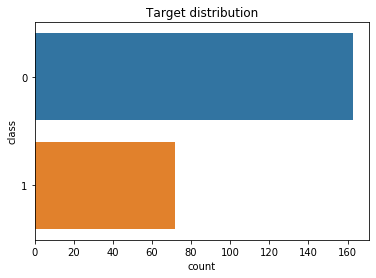

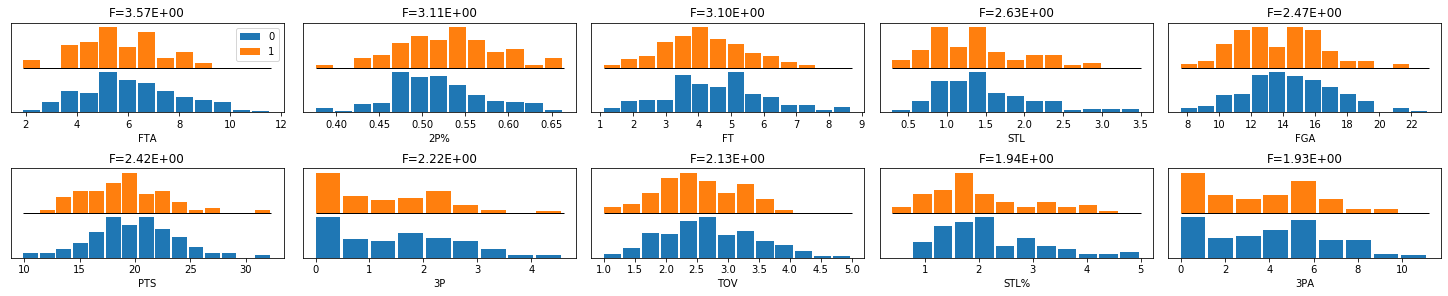

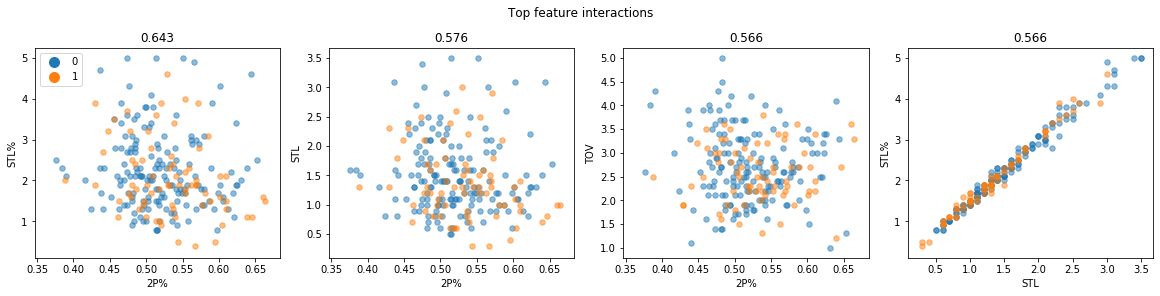

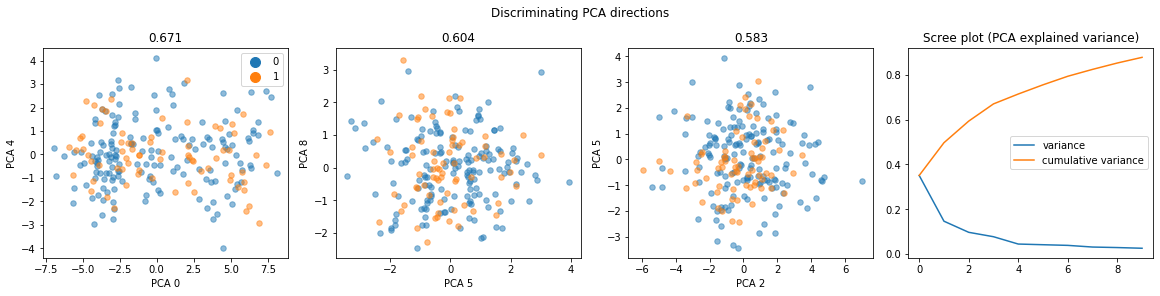

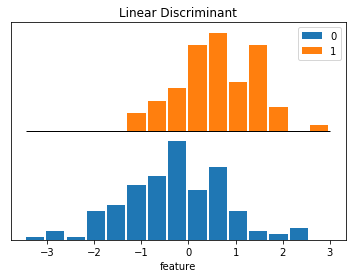

In [5]:
dabl.plot(df, target_col="Bench")

In [6]:
sc = dabl.SimpleClassifier()
sc.fit(df, target_col='Bench')

Running DummyClassifier(strategy='prior')
accuracy: 0.694 average_precision: 0.306 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.410
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.694 average_precision: 0.306 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.410

Running GaussianNB()
accuracy: 0.577 average_precision: 0.364 roc_auc: 0.469 recall_macro: 0.517 f1_macro: 0.471
=== new best GaussianNB() (using recall_macro):
accuracy: 0.577 average_precision: 0.364 roc_auc: 0.469 recall_macro: 0.517 f1_macro: 0.471

Running MultinomialNB()
accuracy: 0.647 average_precision: 0.355 roc_auc: 0.452 recall_macro: 0.492 f1_macro: 0.449
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.361 average_precision: 0.308 roc_auc: 0.503 recall_macro: 0.503 f1_macro: 0.324
Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.485 average_precision: 0.367 roc_auc: 0.536 recall_macro: 0.505 f1_macro: 0.473
Running Deci

SimpleClassifier(random_state=None, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

In [7]:
X = df.drop(['Bench', 'Player'], axis=1)
y = df['Bench']

In [8]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X, y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [9]:
clf.bins

{'Age': array([18.242, 20.176, 22.024, 27.148]),
 'SOS': array([-5.39,  7.17,  8.31, 12.13]),
 'FG': array([ 3.5,  6.3,  7.4, 11.2]),
 'FGA': array([ 7.6, 12.9, 15.5, 23.1]),
 'FG%': array([0.369, 0.453, 0.5  , 0.664]),
 '2P': array([ 2.2,  4.7,  6.1, 10.2]),
 '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
 '2P%': array([0.376, 0.497, 0.541, 0.664]),
 '3P': array([0. , 0.8, 2. , 4.6]),
 '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
 '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
 'FT': array([1.1, 3.8, 5. , 8.7]),
 'FTA': array([ 1.9,  5.1,  6.8, 11.6]),
 'FT%': array([0.295, 0.706, 0.783, 0.925]),
 'TRB': array([ 2.8,  6.1,  9.6, 16.7]),
 'AST': array([ 0.2,  1.9,  3.4, 11.8]),
 'STL': array([0.3, 1.1, 1.6, 3.5]),
 'BLK': array([0. , 0.5, 1.2, 5.8]),
 'TOV': array([1. , 2.3, 3. , 5. ]),
 'PF': array([1.4, 2.5, 3.2, 7.6]),
 'PTS': array([ 9.9, 17.8, 21.1, 32.3]),
 'ORtg': array([ 95.5, 113.4, 119.2, 139. ]),
 'DRtg': array([ 78.1,  93.1,  99.6, 112.2]),
 'PER': array([11.9, 21.9, 25.9, 36.2]),
 'TS%':

In [10]:
output_bins = clf.bins #will be used later in this exercise

In [11]:
out_X = clf.transform(X)

In [12]:
out_X.head()

,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,STL%,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference
0,"(18.241, 20.176]","(7.17, 8.31]","(6.3, 7.4]","(12.9, 15.5]","(0.5, 0.664]","(4.7, 6.1]","(3.999, 9.1]","(0.541, 0.664]","(2.0, 4.6]","(2.2, 5.4]",...,"(2.3, 5.0]","(1.4, 3.4]","(14.7, 27.8]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
1,"(18.241, 20.176]","(8.31, 12.13]","(6.3, 7.4]","(12.9, 15.5]","(0.368, 0.453]","(2.1990000000000003, 4.7]","(3.999, 9.1]","(0.375, 0.497]","(2.0, 4.6]","(5.4, 11.2]",...,"(0.399, 1.7]","(0.099, 1.4]","(14.7, 27.8]","(0.794, 1.375]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(3.0, 4.5]"
2,"(20.176, 22.024]","(8.31, 12.13]","(7.4, 11.2]","(15.5, 23.1]","(0.368, 0.453]","(6.1, 10.2]","(11.5, 17.3]","(0.375, 0.497]","(0.8, 2.0]","(5.4, 11.2]",...,"(2.3, 5.0]","(0.099, 1.4]","(5.699, 12.0]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
3,"(22.024, 27.148]","(-5.391, 7.17]","(7.4, 11.2]","(15.5, 23.1]","(0.368, 0.453]","(6.1, 10.2]","(11.5, 17.3]","(0.375, 0.497]","(2.0, 4.6]","(5.4, 11.2]",...,"(1.7, 2.3]","(0.099, 1.4]","(12.0, 14.7]","(0.794, 1.375]","(68.999, 78.0]","(159.999, 205.0]","(24.0, 45.597]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
4,"(22.024, 27.148]","(7.17, 8.31]","(7.4, 11.2]","(15.5, 23.1]","(0.453, 0.5]","(6.1, 10.2]","(11.5, 17.3]","(0.497, 0.541]","(0.8, 2.0]","(2.2, 5.4]",...,"(1.7, 2.3]","(0.099, 1.4]","(14.7, 27.8]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(3.0, 4.5]"


In [13]:
from xverse.transformer import WOE

clf = WOE()
clf.fit(X, y)

WOE(exclude_features=None, feature_names='all', mono_cardinality_cutoff=5,
    mono_custom_binning={'2P': array([ 2.2,  4.7,  6.1, 10.2]),
                         '2P%': array([0.376, 0.497, 0.541, 0.664]),
                         '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
                         '3P': array([0. , 0.8, 2. , 4.6]),
                         '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
                         '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
                         '3PAr': array([0.   , 0.178, 0.362, 0.666]),
                         'AST': array([ 0.2,  1.9,  3.4,...
              'PER': {Interval(11.899000000000001, 21.9, closed='right'): 0.3707969791622875,
                      Interval(21.9, 25.9, closed='right'): -0.1945168298877728,
                      Interval(25.9, 36.2, closed='right'): -0.24762665520172128},
              'PF': {Interval(1.399, 2.5, closed='right'): 0.1616772292136087,
                     Interval(2.5, 3.2, closed='right'): -0.107174

In [14]:
clf.woe_df.head(10)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,2P,"(2.1990000000000003, 4.7]",79,23,56,0.291139,0.708861,0.319444,0.343558,-0.072773,0.007956
1,2P,"(4.7, 6.1]",78,26,52,0.333333,0.666667,0.361111,0.319018,0.123937,0.007956
2,2P,"(6.1, 10.2]",78,23,55,0.294872,0.705128,0.319444,0.337423,-0.054755,0.007956
3,2P%,"(0.375, 0.497]",80,20,60,0.250000,0.750000,0.277778,0.368098,-0.281528,0.055748
4,2P%,"(0.497, 0.541]",77,23,54,0.298701,0.701299,0.319444,0.331288,-0.036406,0.055748
5,2P%,"(0.541, 0.664]",78,29,49,0.371795,0.628205,0.402778,0.300613,0.292560,0.055748
6,2PA,"(3.999, 9.1]",81,28,53,0.345679,0.654321,0.388889,0.325153,0.178997,0.022038
7,2PA,"(9.1, 11.5]",78,21,57,0.269231,0.730769,0.291667,0.349693,-0.181445,0.022038
8,2PA,"(11.5, 17.3]",76,23,53,0.302632,0.697368,0.319444,0.325153,-0.017714,0.022038
9,3P,"(-0.001, 0.8]",82,29,53,0.353659,0.646341,0.402778,0.325153,0.214088,0.026120


In [15]:
clf.iv_df

,Variable_Name,Information_Value
18,FG%,0.132061
23,FTr,0.093228
20,FT,0.086998
28,PER,0.081987
15,DRtg,0.075157
22,FTA,0.067098
30,PTS,0.066017
14,DRB%,0.062726
24,Hght\n(inches),0.057634
1,2P%,0.055748


In [16]:
output_woe_bins = clf.woe_bins #future transformation

In [17]:
output_woe_bins

{'2P': {Interval(2.1990000000000003, 4.7, closed='right'): -0.07277339301529268,
  Interval(4.7, 6.1, closed='right'): 0.12393690123076169,
  Interval(6.1, 10.2, closed='right'): -0.0547548875126143},
 '2P%': {Interval(0.375, 0.497, closed='right'): -0.28152820687740265,
  Interval(0.497, 0.541, closed='right'): -0.03640574884441762,
  Interval(0.541, 0.664, closed='right'): 0.2925596136665544},
 '2PA': {Interval(3.999, 9.1, closed='right'): 0.17899667841378905,
  Interval(9.1, 11.5, closed='right'): -0.18144474832042007,
  Interval(11.5, 17.3, closed='right'): -0.017713615832265276},
 '3P': {Interval(-0.001, 0.8, closed='right'): 0.21408799822505917,
  Interval(0.8, 2.0, closed='right'): -0.11722515558612628,
  Interval(2.0, 4.6, closed='right'): -0.12737752705014427},
 '3P%': {Interval(-0.001, 0.304, closed='right'): 0.1616772292136087,
  Interval(0.304, 0.377, closed='right'): 0.10488870626006709,
  Interval(0.377, 0.6, closed='right'): -0.29891994958927176},
 '3PA': {Interval(-0.00

In [18]:
output_mono_bins = clf.mono_custom_binning  #future transformation

In [19]:
output_mono_bins

{'Age': array([18.242, 20.176, 22.024, 27.148]),
 'SOS': array([-5.39,  7.17,  8.31, 12.13]),
 'FG': array([ 3.5,  6.3,  7.4, 11.2]),
 'FGA': array([ 7.6, 12.9, 15.5, 23.1]),
 'FG%': array([0.369, 0.453, 0.5  , 0.664]),
 '2P': array([ 2.2,  4.7,  6.1, 10.2]),
 '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
 '2P%': array([0.376, 0.497, 0.541, 0.664]),
 '3P': array([0. , 0.8, 2. , 4.6]),
 '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
 '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
 'FT': array([1.1, 3.8, 5. , 8.7]),
 'FTA': array([ 1.9,  5.1,  6.8, 11.6]),
 'FT%': array([0.295, 0.706, 0.783, 0.925]),
 'TRB': array([ 2.8,  6.1,  9.6, 16.7]),
 'AST': array([ 0.2,  1.9,  3.4, 11.8]),
 'STL': array([0.3, 1.1, 1.6, 3.5]),
 'BLK': array([0. , 0.5, 1.2, 5.8]),
 'TOV': array([1. , 2.3, 3. , 5. ]),
 'PF': array([1.4, 2.5, 3.2, 7.6]),
 'PTS': array([ 9.9, 17.8, 21.1, 32.3]),
 'ORtg': array([ 95.5, 113.4, 119.2, 139. ]),
 'DRtg': array([ 78.1,  93.1,  99.6, 112.2]),
 'PER': array([11.9, 21.9, 25.9, 36.2]),
 'TS%':

In [20]:
clf.transform(X).head()

,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,STL%,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference
0,-0.012195,-0.012195,-0.030214,0.043894,0.181095,0.123937,0.178997,0.292560,-0.127378,-0.202747,...,-0.163745,-0.030214,-0.117225,-0.247627,-0.112452,-0.090473,-0.169411,-0.115736,-0.264721,0.038415
1,-0.012195,-0.080858,-0.030214,0.043894,-0.553462,-0.072773,0.178997,-0.281528,-0.127378,-0.089637,...,0.192930,-0.152316,-0.117225,0.200898,-0.112452,-0.090473,-0.169411,-0.115736,-0.264721,0.251770
2,-0.117225,-0.080858,-0.145727,-0.247627,-0.553462,-0.054755,-0.017714,-0.281528,-0.117225,-0.089637,...,-0.163745,-0.152316,-0.198836,-0.247627,-0.112452,-0.090473,-0.169411,-0.115736,-0.264721,0.038415
3,0.123937,0.086197,-0.145727,-0.247627,-0.553462,-0.054755,-0.017714,-0.281528,-0.127378,-0.089637,...,-0.070219,-0.152316,0.292560,0.200898,-0.112452,-0.090473,-0.045962,-0.115736,-0.264721,0.038415
4,0.123937,-0.012195,-0.145727,-0.247627,0.292560,-0.054755,-0.017714,-0.036406,-0.117225,-0.202747,...,-0.070219,-0.152316,-0.117225,-0.247627,-0.112452,-0.090473,-0.169411,-0.115736,-0.264721,0.251770


In [21]:
from xverse.graph import BarCharts

In [22]:
woe_df = clf.woe_df

In [23]:
clf = BarCharts(bar_type='v')

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/anaconda3/lib/python3.7/site-packages/xverse/graph/_bivariate_charts.py:152: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


BarCharts(bar_color='#058caa', bar_type='v', exclude_features=None,
          feature_names='all', fig_size=(8, 6), num_color='#ed8549',
          plot_metric='mean')

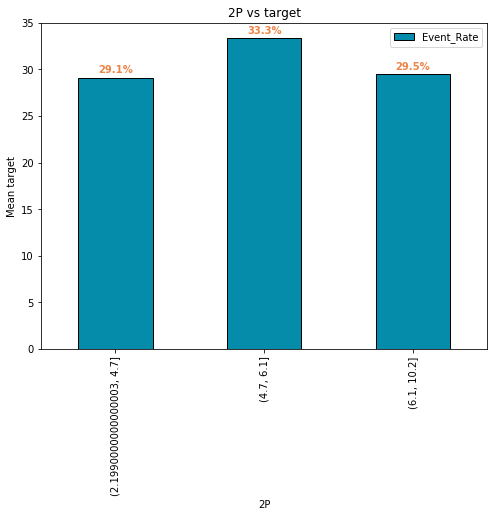

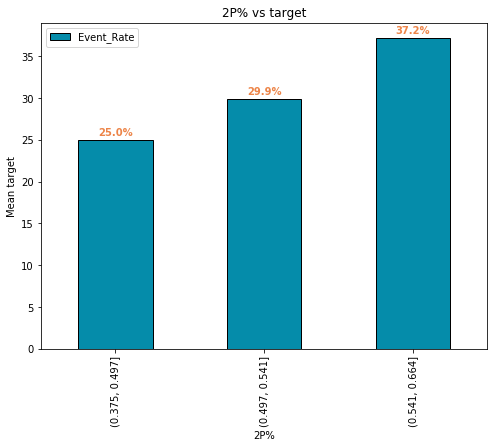

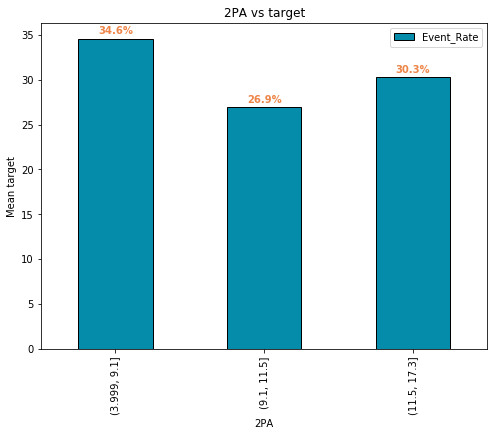

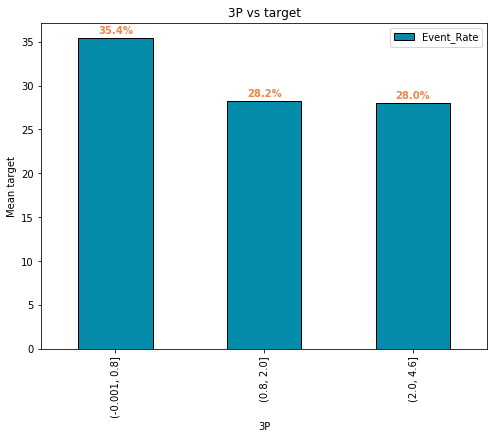

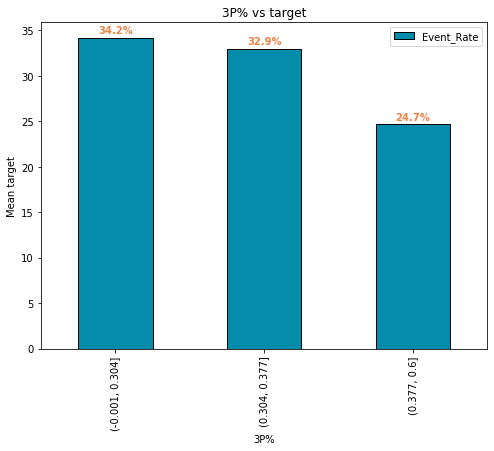

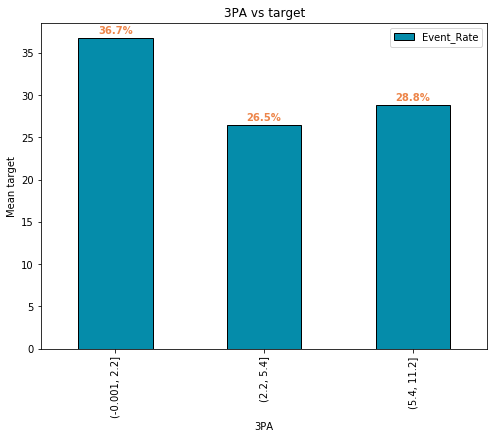

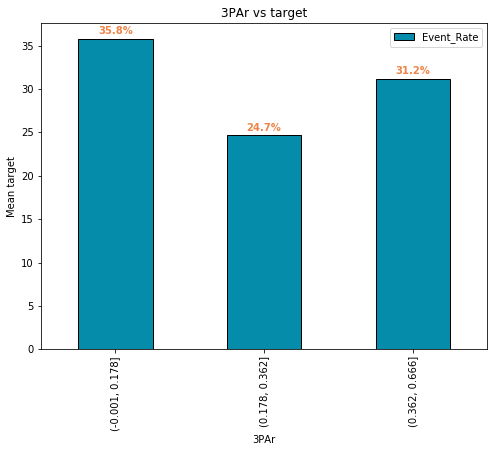

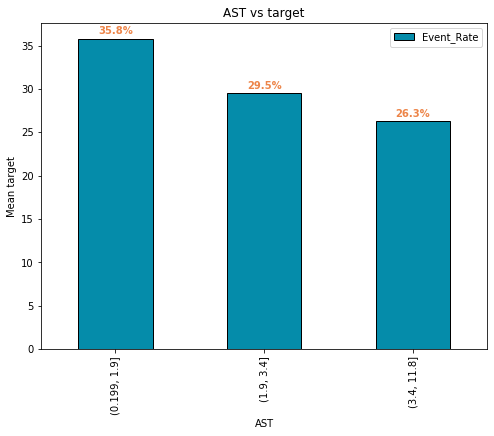

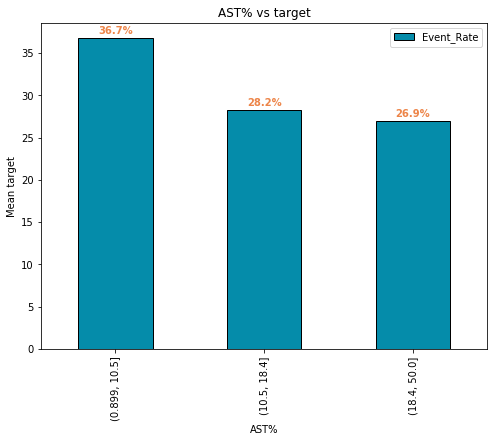

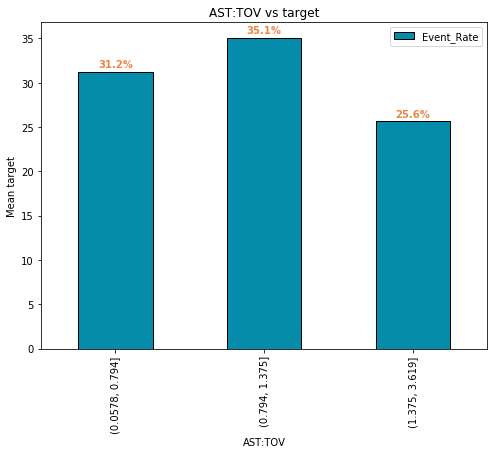

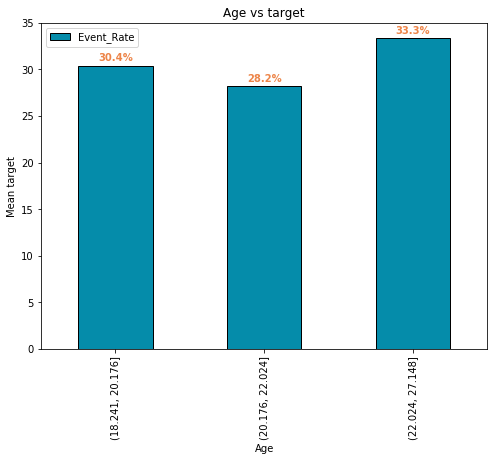

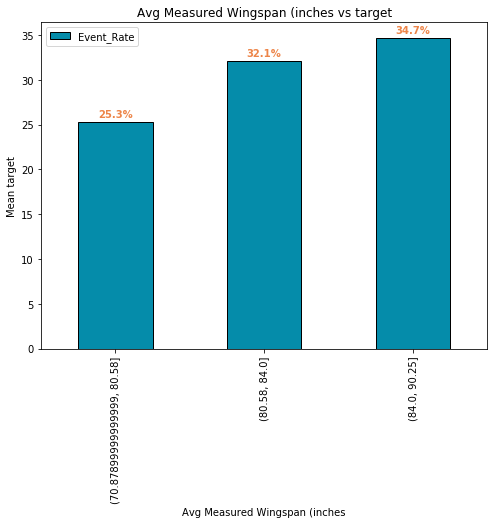

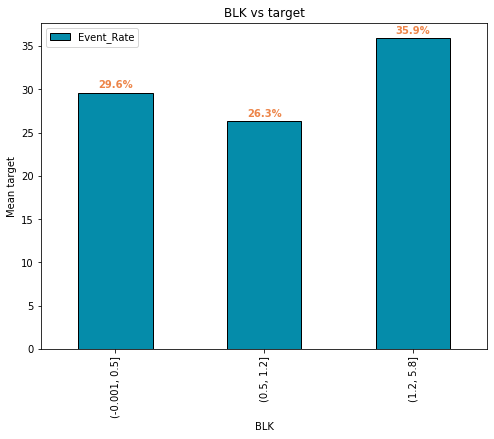

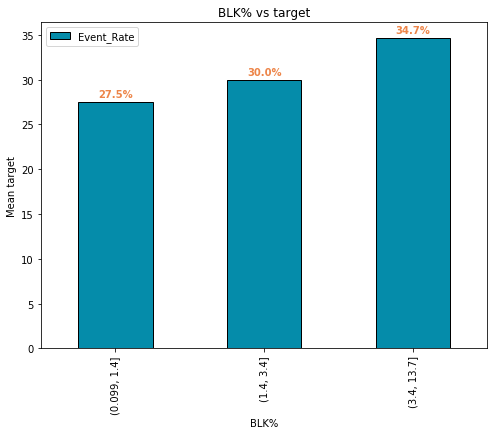

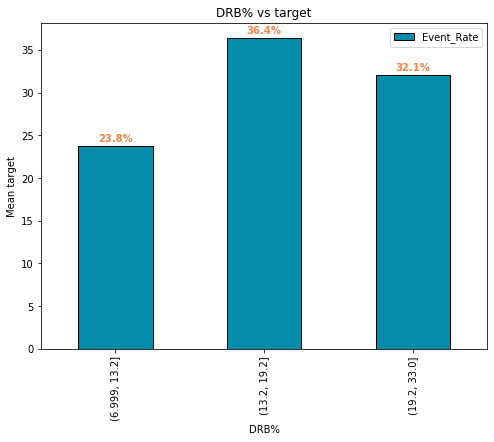

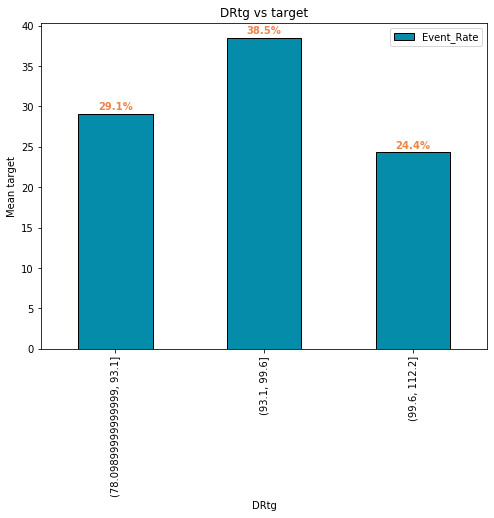

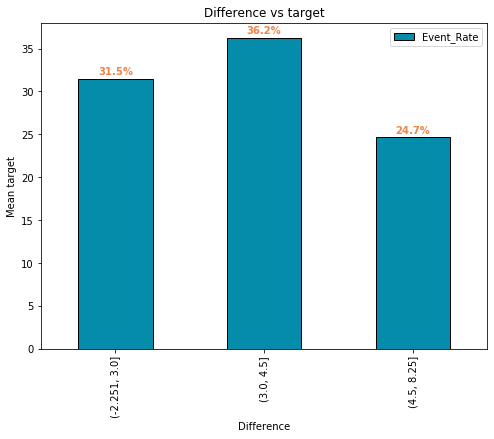

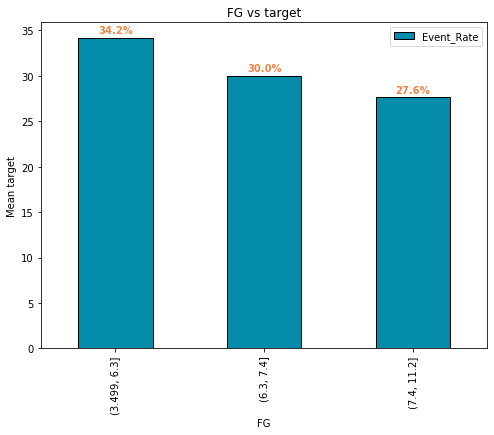

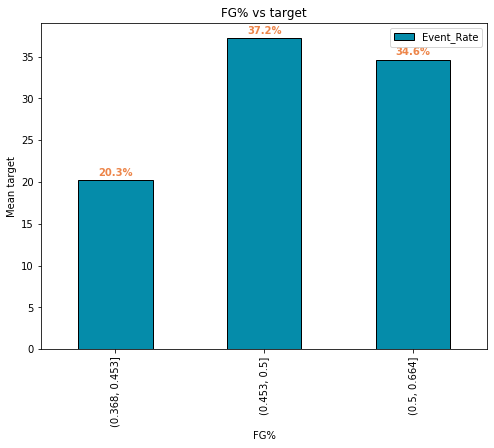

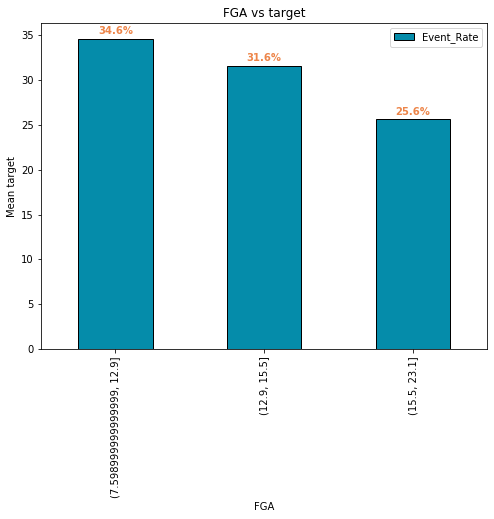

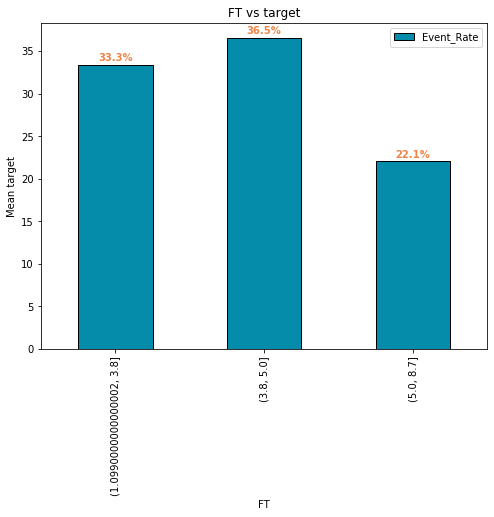

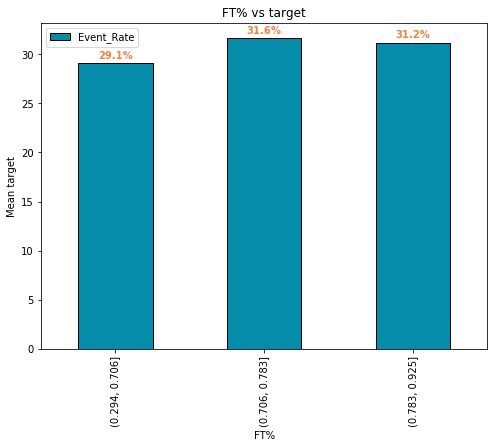

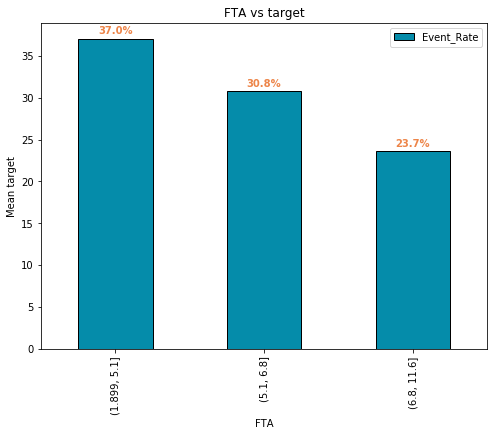

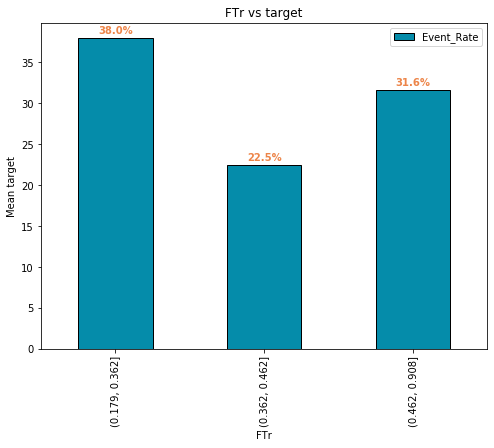

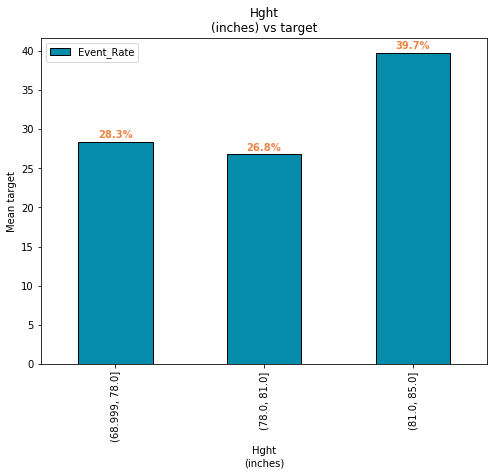

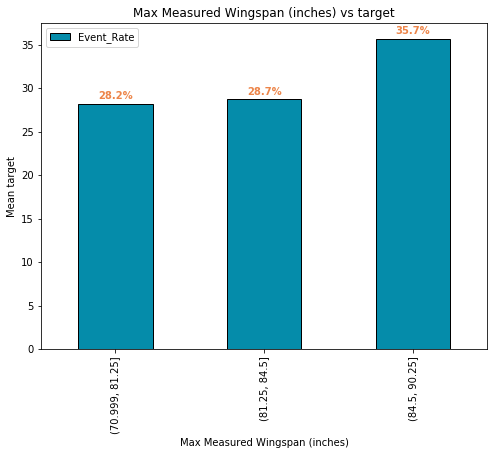

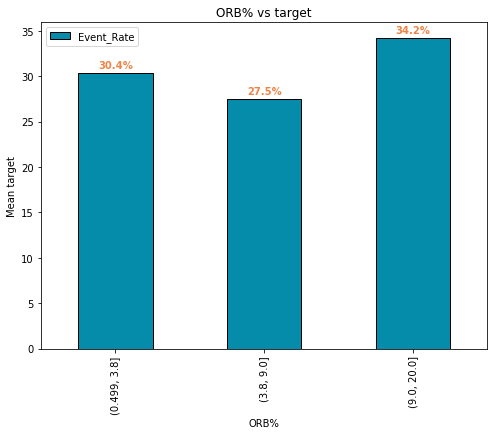

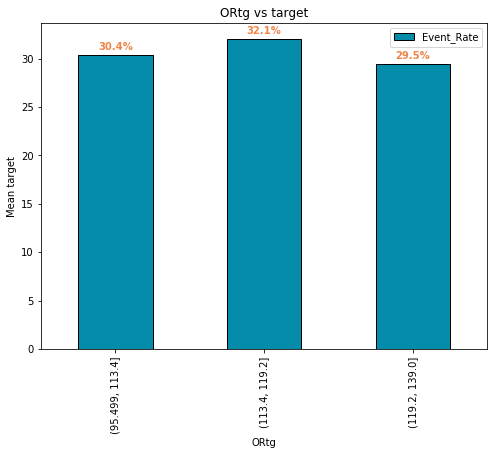

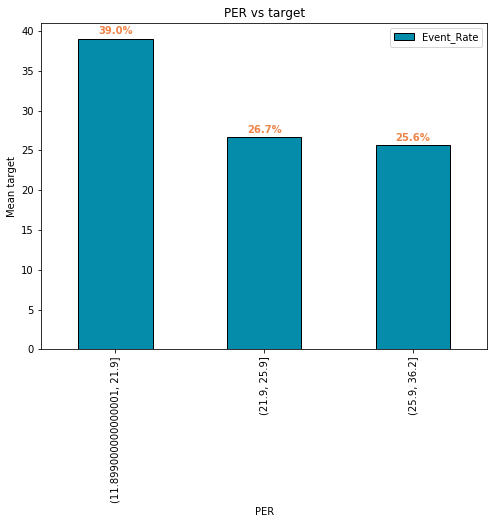

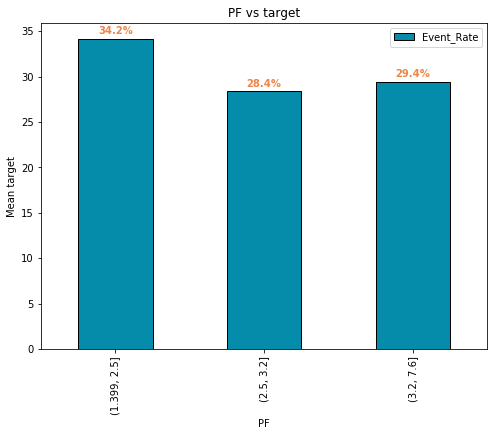

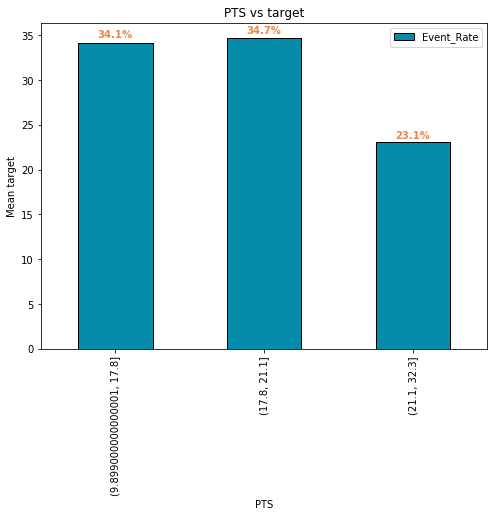

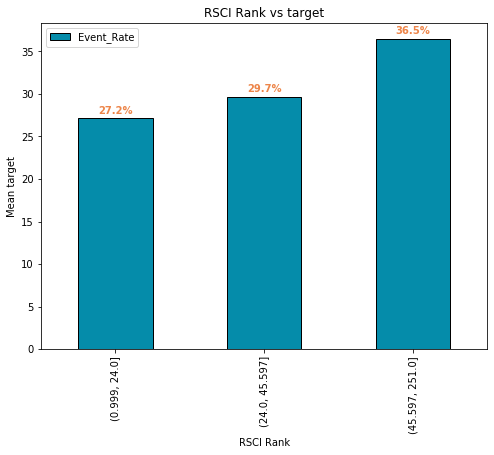

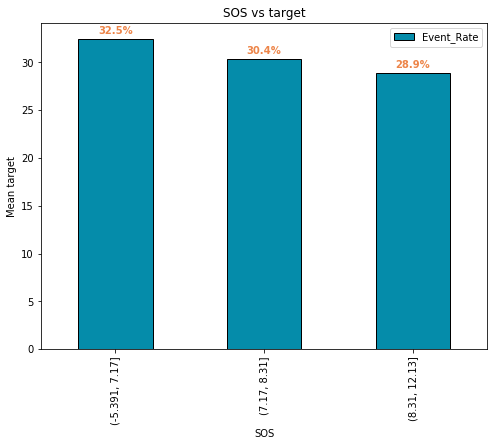

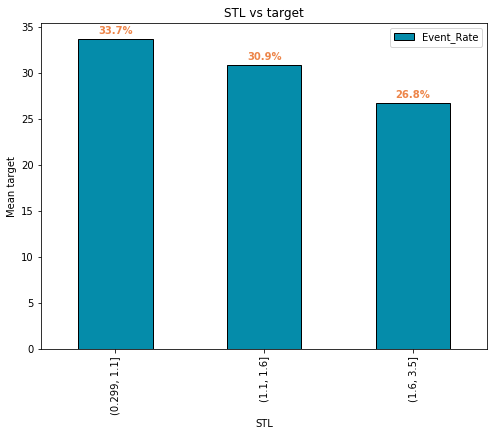

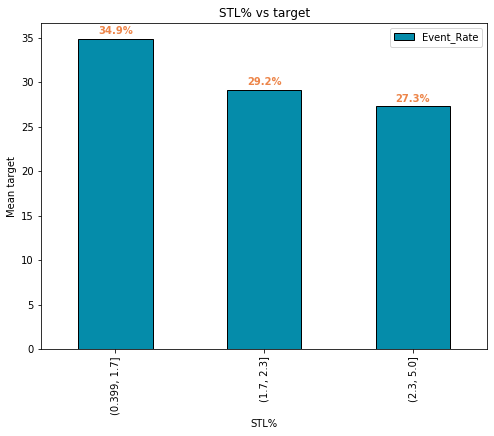

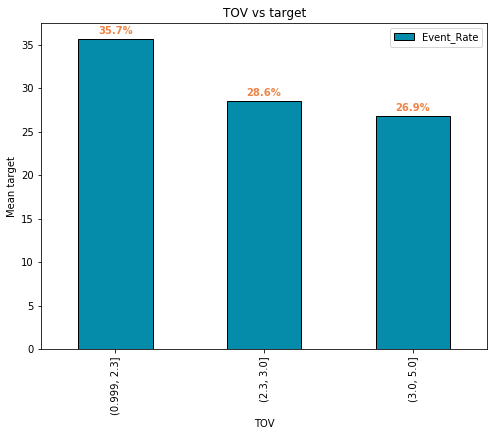

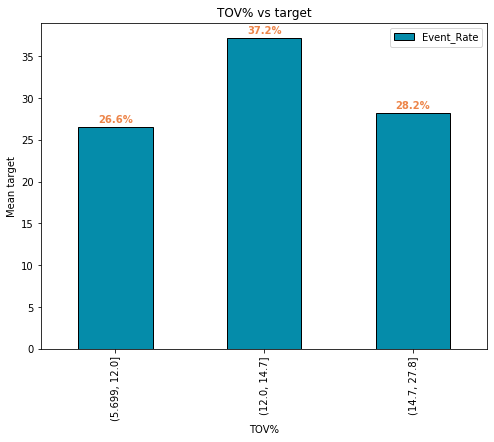

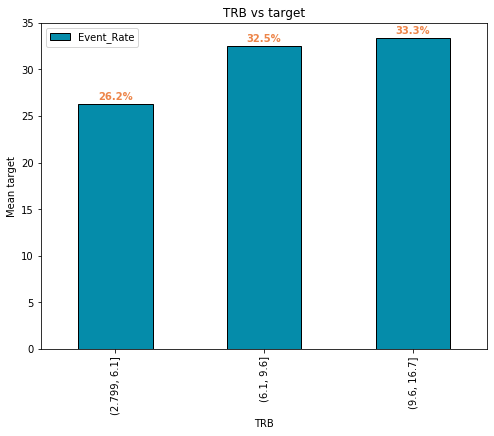

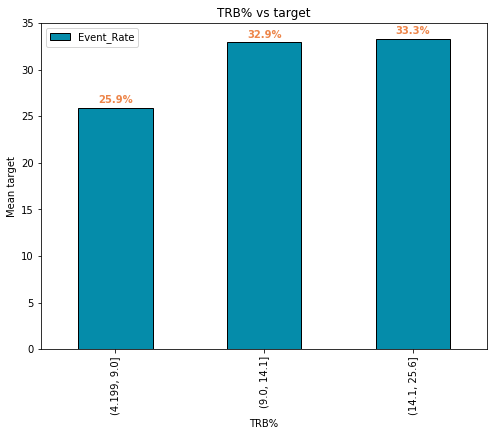

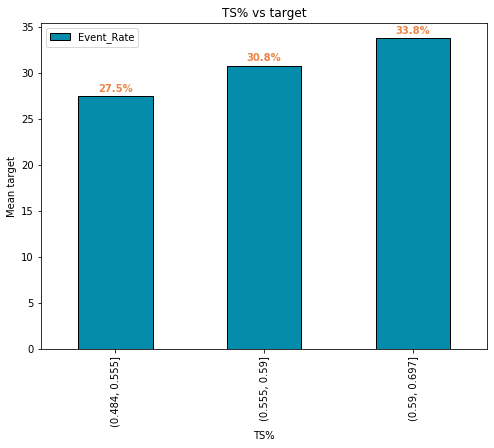

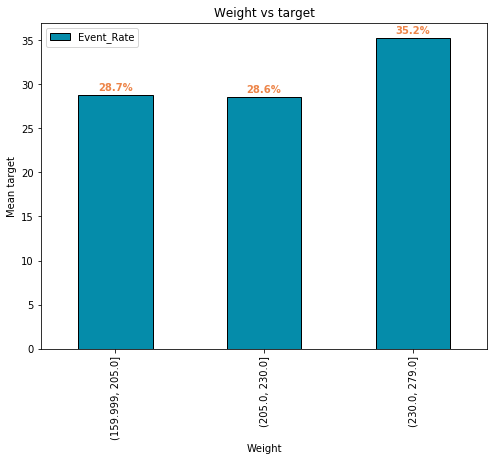

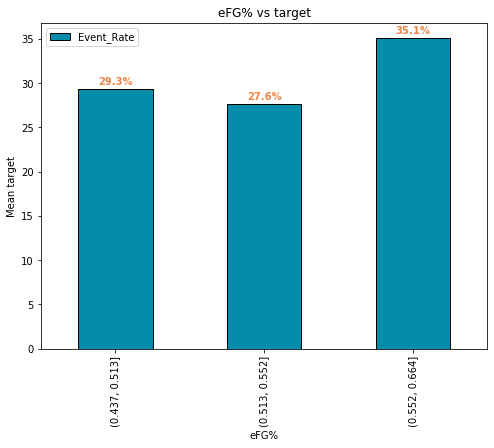

In [24]:
clf.plot(woe_df)

In [25]:
from xverse.ensemble import VotingSelector

clf = VotingSelector()
clf.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

VotingSelector(exclude_features=None, feature_names='all',
               handle_category='woe', minimum_votes=0, no_of_features=21,
               numerical_missing_values='median',
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [26]:
clf.available_techniques

['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE']

In [27]:
clf.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,FG%,0.132061,0.036749,0.000000,0.027561,0.135293,0.000000
1,FTr,0.093228,0.026268,0.000000,0.022072,0.091268,0.000000
2,FT,0.086998,0.033806,0.004590,0.030000,0.255853,0.000000
3,PER,0.081987,0.033404,0.309530,0.023260,0.009212,0.000000
4,DRtg,0.075157,0.022555,0.000000,0.026957,0.046111,-0.003617
5,FTA,0.067098,0.027077,0.000000,0.033609,0.296122,0.000000
6,PTS,0.066017,0.051861,-0.570136,0.038771,0.163321,-0.009651
7,DRB%,0.062726,0.004495,0.000000,0.020986,0.125188,0.000000
8,Hght\n(inches),0.057634,0.019314,0.000000,0.024927,0.062922,0.000000
9,2P%,0.055748,0.029885,0.000000,0.019915,0.212003,0.000000


In [28]:
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
2,FT,1,1,1,1,1,1,6
6,PTS,1,1,1,1,1,1,6
0,FG%,1,1,0,1,1,1,5
13,3PA,1,1,1,0,1,1,5
3,PER,1,1,1,1,0,1,5
5,FTA,1,1,0,1,1,1,5
11,3PAr,1,1,1,0,1,1,5
1,FTr,1,1,0,0,1,1,4
20,TOV,1,0,1,1,1,0,4
17,AST,1,0,1,0,1,1,4


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
list(df.columns) 

['Player',
 'Age',
 'SOS',
 'FG',
 'FGA',
 'FG%',
 '2P',
 '2PA',
 '2P%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'ORtg',
 'DRtg',
 'PER',
 'TS%',
 'eFG%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'AST:TOV',
 'Hght\n(inches)',
 'Weight',
 'RSCI Rank',
 'Max Measured Wingspan (inches)',
 'Avg Measured Wingspan (inches',
 'Difference',
 'Bench']

In [32]:
features = ['SOS','FG','FGA','FG%', '2P','2PA','2P%','3P','3P%','FT','FTA','FT%','TRB','AST',
'STL','BLK','TOV','PF','PTS','ORtg','PER','TS%','eFG%','3PAr','FTr', 'ORB%','DRB%','TRB%','AST%',
 'BLK%','TOV%','AST:TOV','Hght\n(inches)','Weight','RSCI Rank', 'Max Measured Wingspan (inches)',
'Avg Measured Wingspan (inches', 'Difference']

In [33]:
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


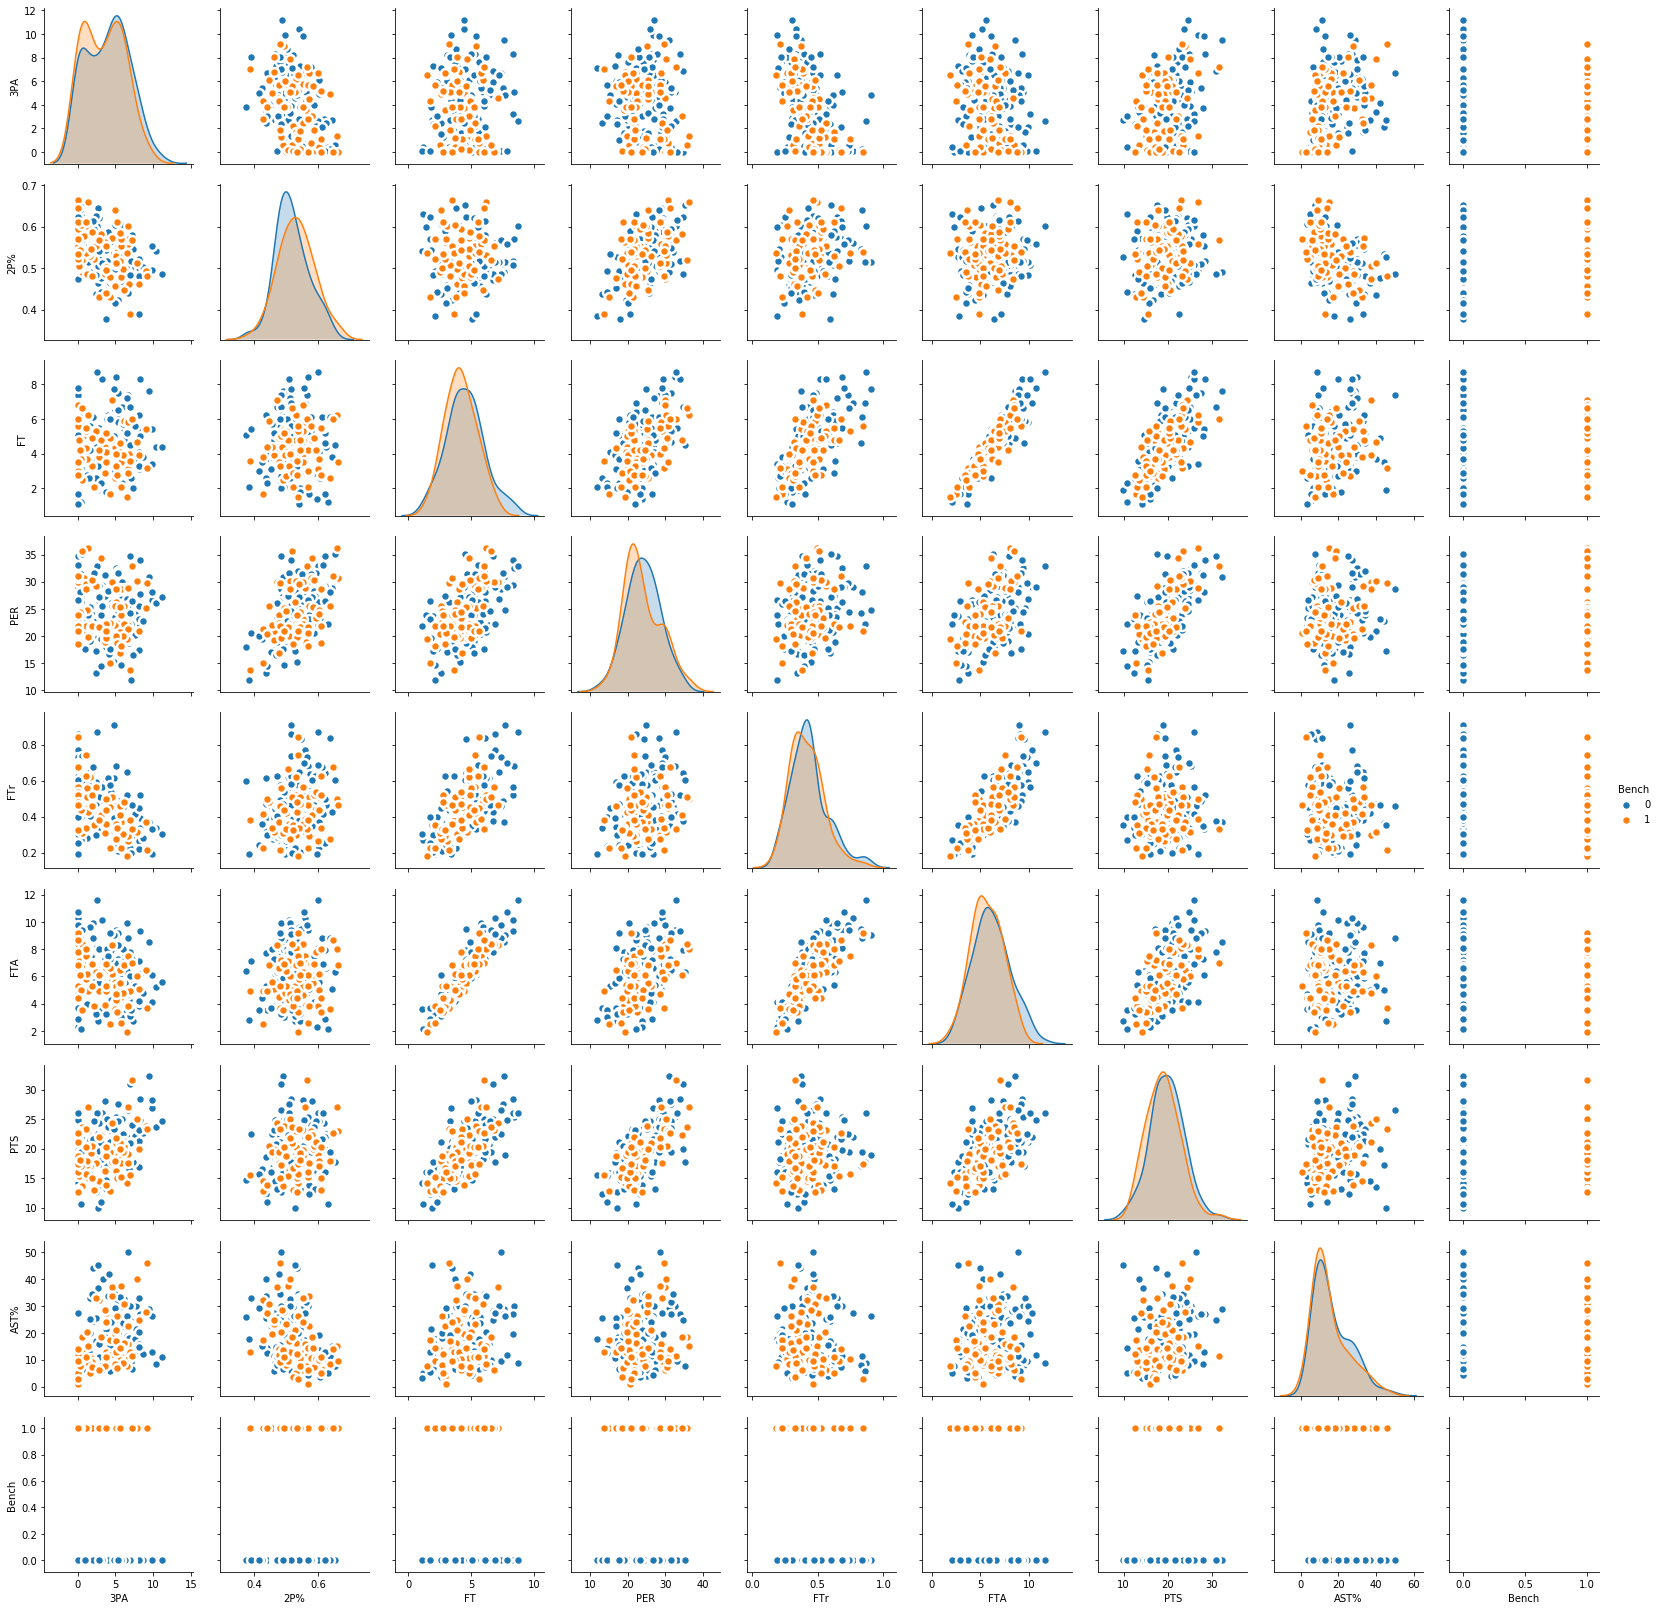

In [34]:
sns.pairplot(df[['3PA','2P%','FT','PER','FTr','FTA','PTS','AST%','Bench']], hue='Bench',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


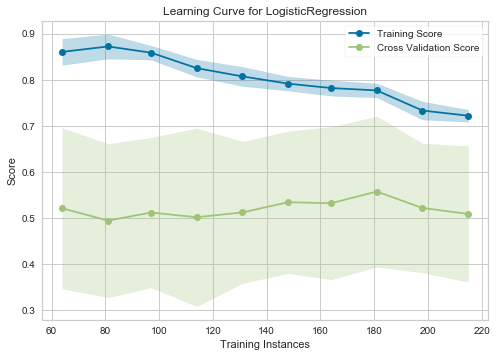

In [35]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


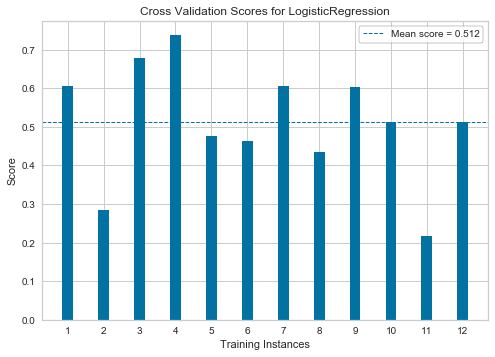

In [36]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [38]:
X = df.drop(['SOS','FG','FG%','FGA','2P','2PA','3P','3P%','FT%','FTA','TRB', 'Player', 'Age',
 'STL','BLK','TOV','PF','ORtg','DRtg','TS%','eFG%','3PAr','Bench', 'DRB%','ORB%', 'TRB%',
 'AST','STL%','BLK%','TOV%','AST:TOV','Hght\n(inches)', 'Weight','RSCI Rank', 'Max Measured Wingspan (inches)',
 'Avg Measured Wingspan (inches','Difference'], axis=1)
y = df['Bench']

In [39]:
X

,2P%,3PA,FT,PTS,PER,FTr,AST%
0,0.569,5.1,8.4,25.3,32.5,0.683,29.8
1,0.461,6.8,4.0,19.3,19.3,0.333,23.4
2,0.471,5.9,6.7,25.0,29.9,0.426,28.0
3,0.491,9.5,7.6,32.3,30.9,0.369,28.8
4,0.501,5.2,5.9,24.3,25.7,0.405,30.3
...,...,...,...,...,...,...,...
230,0.664,0.0,3.5,23.0,30.7,0.462,9.4
231,0.646,0.0,6.0,22.7,31.1,0.674,13.9
232,0.623,0.1,1.7,16.1,26.4,0.253,12.9
233,0.568,0.0,5.1,21.6,26.6,0.456,4.2


/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


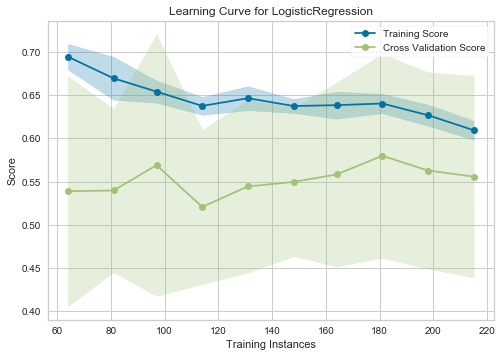

In [40]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


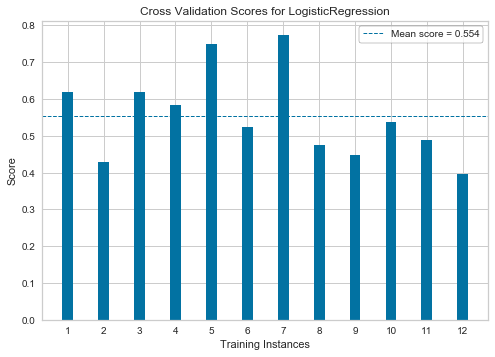

In [41]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [42]:
X

,2P%,3PA,FT,PTS,PER,FTr,AST%
0,0.569,5.1,8.4,25.3,32.5,0.683,29.8
1,0.461,6.8,4.0,19.3,19.3,0.333,23.4
2,0.471,5.9,6.7,25.0,29.9,0.426,28.0
3,0.491,9.5,7.6,32.3,30.9,0.369,28.8
4,0.501,5.2,5.9,24.3,25.7,0.405,30.3
...,...,...,...,...,...,...,...
230,0.664,0.0,3.5,23.0,30.7,0.462,9.4
231,0.646,0.0,6.0,22.7,31.1,0.674,13.9
232,0.623,0.1,1.7,16.1,26.4,0.253,12.9
233,0.568,0.0,5.1,21.6,26.6,0.456,4.2


In [43]:
features = ['FTr', '2P%', '3PA','FT','PTS','PER','AST%']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Train accuracy: 0.7045454545454546
Test accuracy: 0.6271186440677966
ROC AUC: 0.5275689223057645


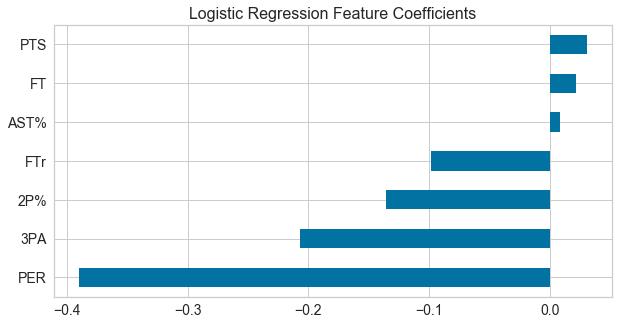

In [45]:
logreg = LogisticRegression(solver='liblinear', random_state=2).fit(x_train, y_train)
y_scores_logreg = logreg.predict_proba(x_test)[:,1]
y_pred_logreg = logreg.predict(x_test)

print("Train accuracy:",logreg.score(x_train, y_train))
print("Test accuracy:", logreg.score(x_test, y_test))
print("ROC AUC:", roc_auc_score(y_test, y_scores_logreg))

ax = pd.DataFrame(
    logreg.coef_.transpose(),
    index=features,
    columns=['coefficients']
).sort_values('coefficients').plot(
    kind='barh', legend=False, title='Logistic Regression Feature Coefficients', figsize=(10,5), fontsize=14
)

ax.title.set_size(16)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [47]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [48]:
xg_cl = xgb.XGBClassifier()

In [49]:
params = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}

In [50]:
grid_search = GridSearchCV(xg_cl, params, cv = 3, verbose=10, n_jobs=-1)

In [51]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1960s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1202s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  66 out of  81 | elapsed:    2.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.16],
                         'max_depth': [10, 30, 50],
                         'min_child_weight': [1, 3, 6], 

In [52]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [53]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [54]:
xg = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1).fit(X_train, Y_train)
y_scores_xg = xg.predict_proba(X_test)[:,1]

print("Train Accuracy:",xg.score(X_train, Y_train))
print("Test Accuracy:", xg.score(X_test, Y_test))
print("ROC AUC:", roc_auc_score(Y_test, y_scores_xg))

Train Accuracy: 0.8238636363636364
Test Accuracy: 0.6271186440677966
ROC AUC: 0.5902255639097744


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


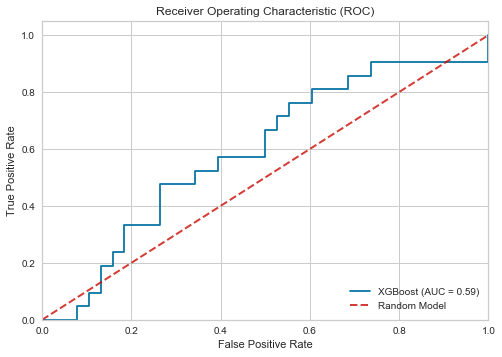

In [55]:
xg_roc_auc = roc_auc_score(Y_test, y_scores_xg)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_scores_xg)
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random Model', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [56]:
import shap

In [57]:
explainer = shap.TreeExplainer(xg)

In [58]:
shap_values = explainer.shap_values(X_train)

In [59]:
shap.initjs()

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/summary.py:464: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


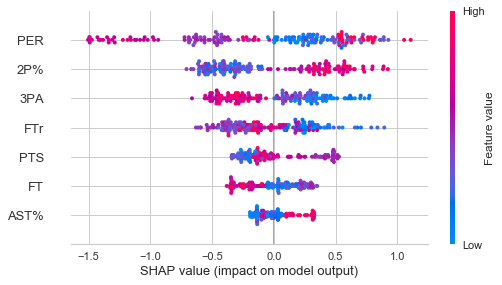

In [60]:
shap.summary_plot(shap_values, X_train)

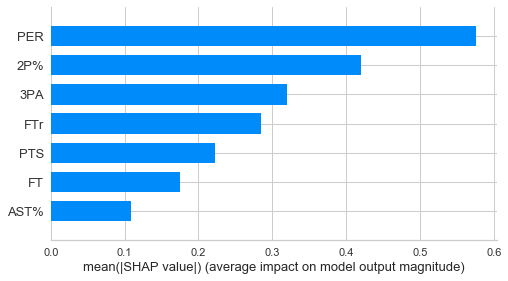

In [61]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [62]:
shap_interaction_values = shap.TreeExplainer(xg).shap_interaction_values(X)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/summary.py:181: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


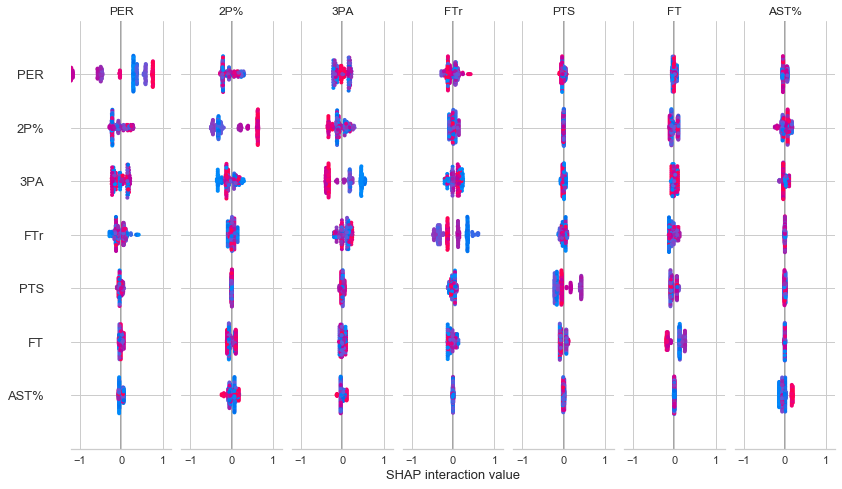

In [63]:
shap.summary_plot(shap_interaction_values, X)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


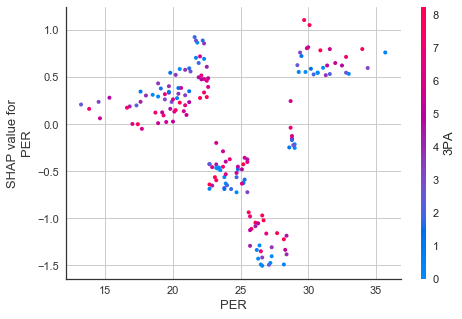

In [64]:
shap.dependence_plot('PER', shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


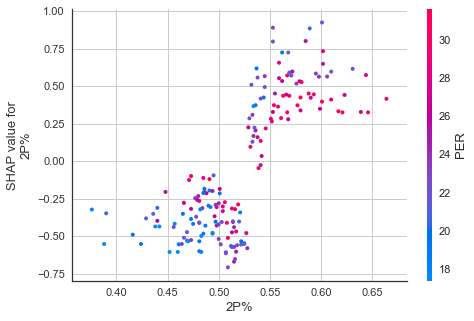

In [65]:
shap.dependence_plot("2P%", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


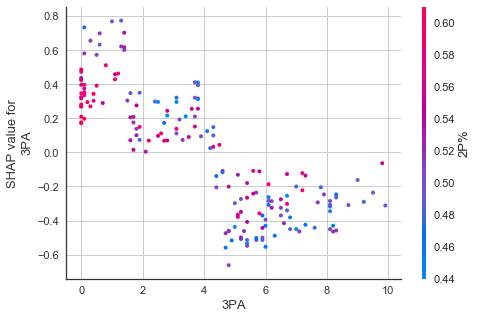

In [66]:
shap.dependence_plot("3PA", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


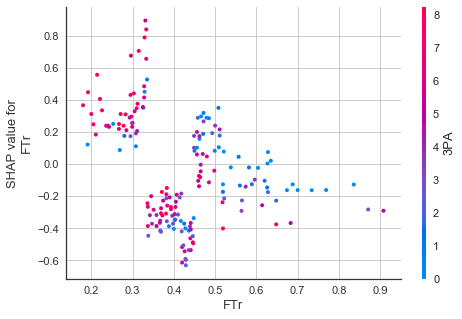

In [67]:
shap.dependence_plot("FTr", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


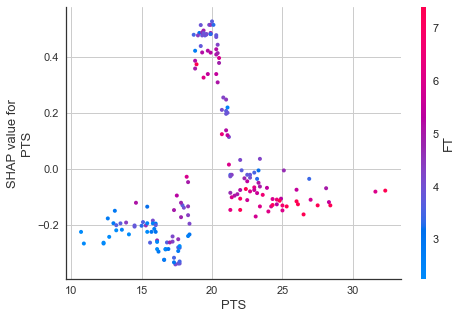

In [68]:
shap.dependence_plot("PTS", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


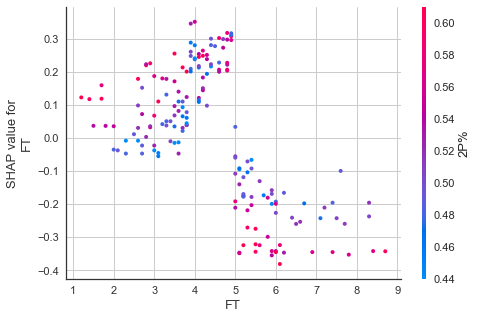

In [69]:
shap.dependence_plot("FT", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


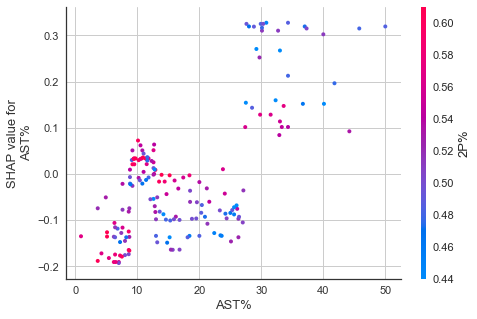

In [70]:
shap.dependence_plot("AST%", shap_values, X_train)

In [71]:
dataset = pd.read_excel('2017 Stats Only Bench.xlsx')

In [72]:
players = dataset['Player']
dataset = dataset.drop('Player', axis=1)
predictions = xg.predict_proba(dataset)[:,1]
print(predictions)

[0.09805885 0.35397863 0.3391804  0.10331189 0.07406918 0.24152279
 0.06302579 0.06828871 0.28740475 0.4082123  0.19467393 0.2617266
 0.24276076 0.22254685 0.14915603 0.09934443 0.31871688 0.27189994
 0.1635179  0.1475326  0.1110701  0.3273381  0.45116633 0.35822278
 0.2953347  0.16364191 0.2819196  0.038298   0.23442306 0.15364857
 0.43924257 0.3498217  0.29524982 0.5730359  0.60977894 0.2382382
 0.38264373 0.58211607 0.14252369 0.06846867 0.32584342 0.5832731
 0.1362955  0.5129543  0.05449534 0.42061982 0.38579467 0.68992573
 0.217277   0.7388679 ]


In [73]:
output = {'Player':players, 'Bench': predictions}
output = pd.DataFrame(output, columns = ['Player', 'Bench'])
print(output)

                 Player     Bench
0        Markelle Fultz  0.098059
1            Lonzo Ball  0.353979
2          De'Aaron Fox  0.339180
3          Dennis Smith  0.103312
4         Derrick White  0.074069
5         Frank Jackson  0.241523
6           Frank Mason  0.063026
7           Jawun Evans  0.068289
8          Monte Morris  0.287405
9         Edmond Sumner  0.408212
10  Nigel Williams-Goss  0.194674
11           Malik Monk  0.261727
12         Luke Kennard  0.242761
13     Donovan Mitchell  0.222547
14            Josh Hart  0.149156
15           Davon Reed  0.099344
16        Wesley Iwundu  0.318717
17         Dwayne Bacon  0.271900
18         Tyler Dorsey  0.163518
19       Damyean Dotson  0.147533
20       Sterling Brown  0.111070
21         Kadeem Allen  0.327338
22          Jabari Bird  0.451166
23         Jayson Tatum  0.358223
24         Josh Jackson  0.295335
25       Justin Jackson  0.163642
26           OG Anunoby  0.281920
27         Semi Ojeleye  0.038298
28        Dill

In [74]:
output.to_excel("2017 Bench Prob Stats Only.xlsx")

In [75]:
dataset = pd.read_excel('2018 Stats Only Bench.xlsx')

In [76]:
players = dataset['Player']
dataset = dataset.drop('Player', axis=1)
predictions = xg.predict_proba(dataset)[:,1]
print(predictions)

[0.5660216  0.6419038  0.09801096 0.07401696 0.17427923 0.13236098
 0.05310307 0.09694058 0.26043564 0.1785816  0.5177353  0.17684418
 0.27676687 0.4304834  0.7507489  0.7179506  0.10365529 0.11592858
 0.4827938  0.01772897 0.2600712  0.5028415  0.13851924 0.32137498
 0.22895832 0.39681196 0.3063431  0.2690851  0.28721532 0.23002982
 0.5942252  0.18593605 0.0954069  0.17674787 0.1254773  0.13152455
 0.3289446  0.19028851 0.12729317 0.18561384]


In [77]:
output = {'Player':players, 'Bench': predictions}
output = pd.DataFrame(output, columns = ['Player', 'Bench'])
print(output)

                 Player     Bench
0         DeAndre Ayton  0.566022
1         Marvin Bagley  0.641904
2     Jaren Jackson Jr.  0.098011
3         Mohamed Bamba  0.074017
4        Michael Porter  0.174279
5        Wendell Carter  0.132361
6            Trae Young  0.053103
7         Collin Sexton  0.096941
8         Mikal Bridges  0.260436
9            Kevin Knox  0.178582
10  Shai Gilgeous-Al...  0.517735
11        Miles Bridges  0.176844
12      Robert Williams  0.276767
13         Zhaire Smith  0.430483
14        Landry Shamet  0.750749
15         Khyri Thomas  0.717951
16       Gary Trent Jr.  0.103655
17        Lonnie Walker  0.115929
18        Kevin Huerter  0.482794
19   Chandler Hutchison  0.017729
20           Troy Brown  0.260071
21     Donte DiVincenzo  0.502841
22       Omari Spellman  0.138519
23        Jalen Brunson  0.321375
24        Aaron Holiday  0.228958
25      Jerome Robinson  0.396812
26         Trevon Duval  0.306343
27          Josh Okogie  0.269085
28    De'Antho

In [78]:
output.to_excel("2018 Bench Prob Stats Only.xlsx")